In [16]:
%matplotlib inline
import geopandas as gpd
 
import sys
sys.path.insert(0, "../")
from weavingspace import WeaveUnit
from weavingspace import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [17]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Biaxial weave

<Axes: >

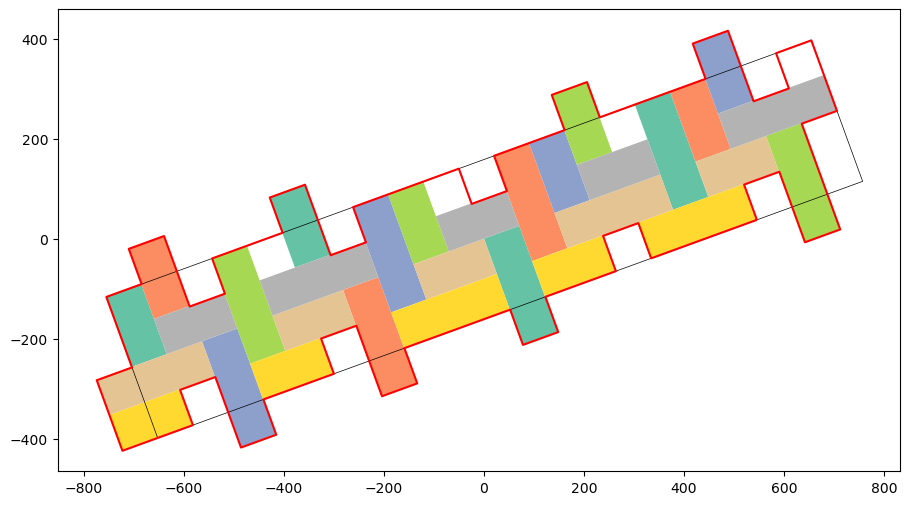

In [18]:
w1 = WeaveUnit(weave_type = "twill", n = 2, spacing = 75, aspect = 1,
               strands = "abcd-|efg-", crs = ak.crs).transform_rotate(20)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6), show_ids = False)

In [19]:
weave1 = Tiling(w1, ak)

In [20]:
# import copy

# tiles = copy.deepcopy(weave1.tiles)
# areas = copy.deepcopy(ak)

In [21]:
# tiles.geometry = tiles.centroid
# tiles["tileUID"] = range(tiles.shape[0])

In [22]:
# tiles.sjoin(areas, how = "inner")[["tileUID", "DZ2018"]]

In [23]:
textile1 = weave1.get_tiled_map(# prioritise_tiles = False, 
                                # ragged_edges = False, 
                                debug = True, rotation = 0)

STEP 1: prep data (rotation if requested): 0.002
STEP A2: overlay zones with tiling: 0.270
STEP A3: calculate areas: 0.001
STEP A4: drop columns prior to join: 0.000
STEP A5: build lookup for join: 0.011
STEP A6: perform lookup join: 0.007


In [24]:
textile1.variables = [x for x in ak.columns if "Rank" in x]
textile1.colourmaps = dict(zip(textile1.variables,
                               ("BrBG", "RdGy", "RdYlBu", "Spectral","PiYG", "PRGn", "PuOr")))

Only a list of variables specified, assigning to
            available tile_ids.


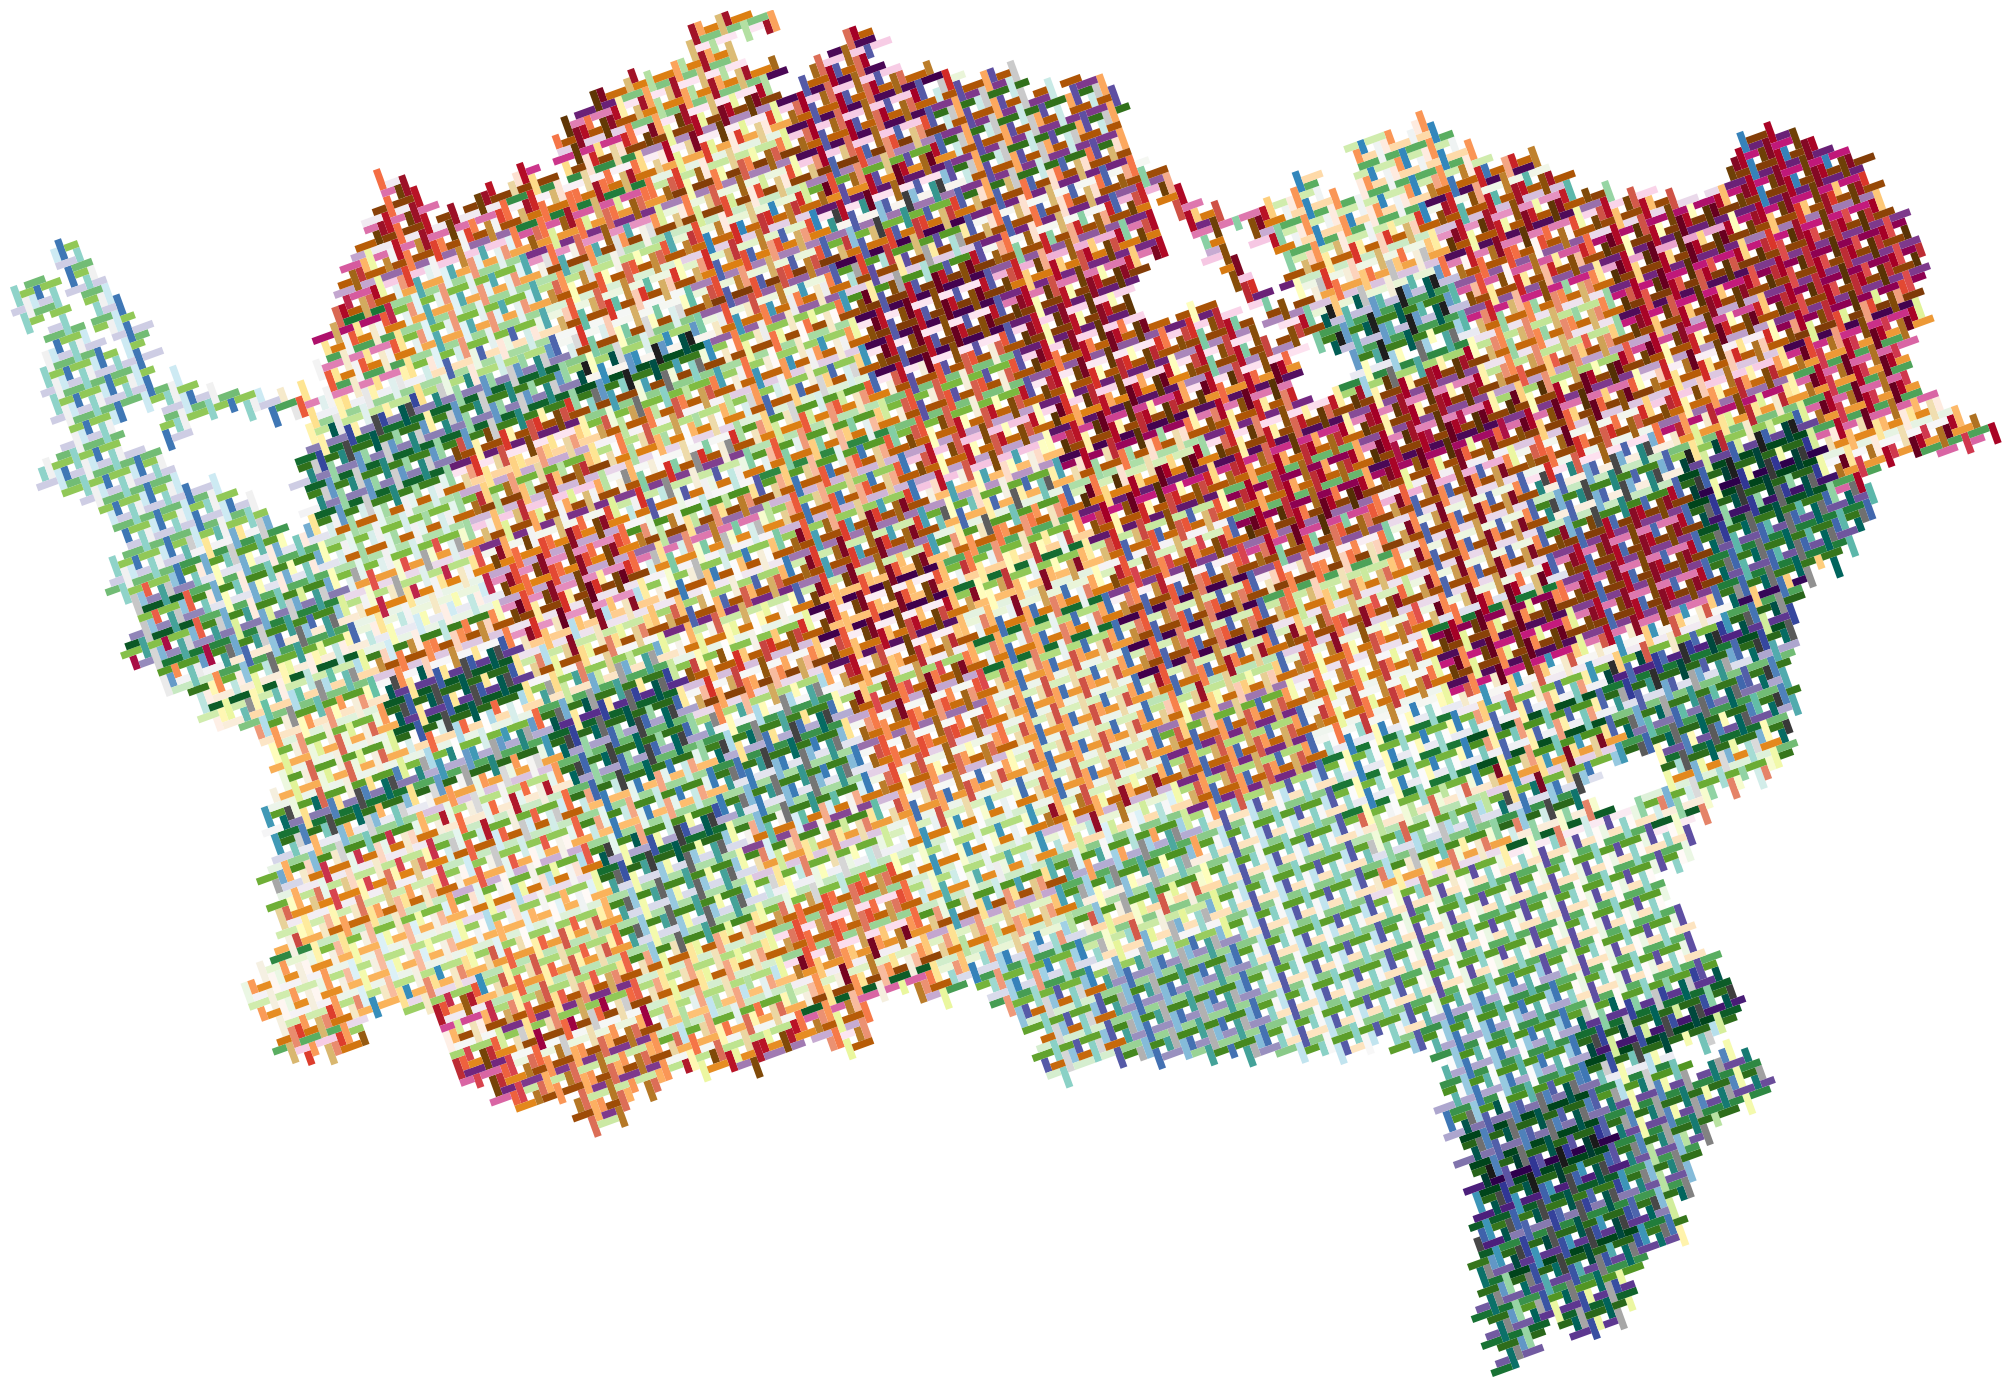

In [25]:
fig = textile1.render(legend = False)

### Exploring alternative steps prioritise tiling elements

In [26]:
import time

tiles = weave1.tiles
tiles.sindex
tiles["tileUID"] = range(tiles.shape[0])

ak.sindex

In [27]:
overlaps = tiles.sjoin(ak)

In [28]:
dups = overlaps.duplicated(subset = ["tileUID"])
mult_overlaps = overlaps.loc[list(dups), ["tile_id", "tileUID", "geometry"]]
mult_overlaps.sindex

In [29]:
overlap_areas = mult_overlaps.overlay(ak)
overlap_areas["area"] = overlap_areas.geometry.area

In [30]:
overlap_areas[["tileUID", "DZ2018", "area", "geometry"]]

,tileUID,DZ2018,area,geometry
0,516,7601542,1273.698574,"POLYGON ((1767803.689 5919350.467, 1767803.925..."
1,516,7601551,1652.356037,"POLYGON ((1767771.832 5919259.058, 1767752.403..."
2,1530,7601459,2450.545302,"POLYGON ((1766054.216 5920469.604, 1765983.739..."
3,1530,7601482,5831.700890,"POLYGON ((1766039.996 5920508.673, 1765975.609..."
4,1553,7601482,14056.365509,"POLYGON ((1766657.417 5920566.604, 1766653.326..."
...,...,...,...,...
18803,28525,7600422,16618.012410,"POLYGON ((1750845.7 5911502.184, 1750854.575 5..."
18804,28528,7600394,2183.724387,"POLYGON ((1750877.056 5911513.596, 1750947.533..."
18805,28528,7600422,9066.275582,"POLYGON ((1750928.359 5911372.642, 1750881.903..."
18806,28534,7600394,9246.761340,"POLYGON ((1750992.358 5911635.376, 1751037.188..."
